# <center>Laboratorium 11<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

In [1]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt

**Cel zajęć:**  
Celem zajęć jest zapoznanie się z metodami całkowania numerycznego funkcji:  
$$
\int\limits_{a}^{b}f(x)dx 
$$  

Dana jest funkcja $f(x)$, należy wyznaczyć wartość całki tej funkcji na przedziale $a$,$b$.


***Zadanie 1.***    
Wyznacz numerycznie wartość całki:   
$$
\int\limits_{a}^{b}\log(1+\tan(x))dx 
$$

Wykonaj następujące czynności:

1. Czy możliwe jest całkowanie podanej funkcji na dowolnym przedziale? Swoją odpowiedź uzasadnij.
2. Oblicz całkę numerycznie na przedziale $a =0$, $b=\cfrac{\pi}{4}$ przy pomocy następujących metod:  
    1. Metoda Trapezów - [trapz](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.trapz.html#scipy.integrate.trapz)
    2. Metoda Simpsona - [simps](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.simps.html#scipy.integrate.simps) 
    3. Metoda Romberga - [romb](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.romb.html#scipy.integrate.romb)  
  
Sprawdź jak wyniki róźnią się od siebie, czy ma na nie wpływ długość wektora $\mathbf{y}$ oraz wartość parametru $dx$

3. Porównaj wyniki i czas obliczeń z punktu 1 z funkcjami:
    1. [quad](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy-integrate-quad)
    2. [romberg](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.romberg.html#scipy.integrate.romberg)
    3. [quadrature](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quadrature.html#scipy.integrate.quadrature)

ad 1
Jest to możliwe na podanym przedziale, ponieważ funkcja jest ciągła, różniczkowalna i ograniczona.

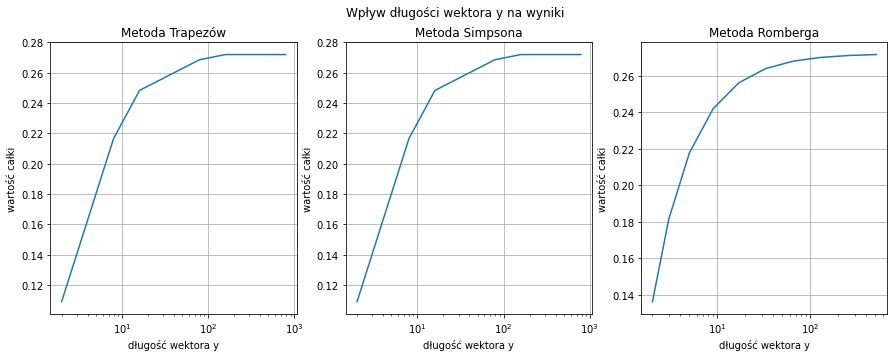

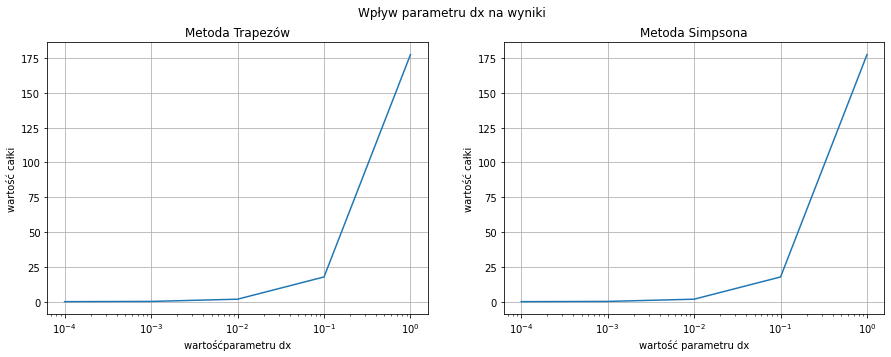

Wynik funkcji quad:  0.27219826128795027

Wynik funkcji romberg:  0.27219826128795016

Wynik funkcji quadrature:  0.27219826128795027


In [58]:
trapz = []
trapz2 = []
simps = []
simps2 = []
romb = []
len_x = []
len2_x = []

a = 0
b = np.pi / 4
fx = lambda x: np.log(1 + np.tan(x)) 

for it in [0.5, 0.1, 0.05, 0.01, 0.005, 0.001]:
    x = np.arange(a, b, it)
    trapz.append(scipy.integrate.trapz(fx(x), x))
    simps.append(scipy.integrate.simps(fx(x), x))
    len_x.append(len(x))

for it in range(0, 10):
    x = np.linspace(a, b, 2 ** it + 1)
    romb.append(scipy.integrate.romb(fx(x), dx=np.pi/4/(2**it+1)))
    len2_x.append(len(x))

for dx in [1, 0.1, 0.01, 0.001, 0.0001]:
    trapz2.append(scipy.integrate.trapz(fx(x), dx=dx))
    simps2.append(scipy.integrate.simps(fx(x), dx=dx))

quad = scipy.integrate.quad(fx, a, b)
romberg = scipy.integrate.romberg(fx, a, b)
quadrature = scipy.integrate.quadrature(fx, a, b)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle('Wpływ długości wektora y na wyniki')
ax1.grid()
ax1.semilogx(len_x, trapz)
ax1.set_title('Metoda Trapezów')
ax1.set_ylabel('wartość całki')
ax1.set_xlabel('długość wektora y')
ax2.grid()
ax2.semilogx(len_x, simps)
ax2.set_title('Metoda Simpsona')
ax2.set_ylabel('wartość całki')
ax2.set_xlabel('długość wektora y')
ax3.grid()
ax3.semilogx(len2_x, romb)
ax3.set_title('Metoda Romberga')
ax3.set_ylabel('wartość całki')
ax3.set_xlabel('długość wektora y')
plt.show()

dx = [1, 0.1, 0.01, 0.001, 0.0001]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Wpływ parametru dx na wyniki')
ax1.grid()
ax1.semilogx(dx, trapz2)
ax1.set_title('Metoda Trapezów')
ax1.set_ylabel('wartość całki')
ax1.set_xlabel('wartośćparametru dx')
ax2.grid()
ax2.semilogx(dx, simps2)
ax2.set_title('Metoda Simpsona')
ax2.set_ylabel('wartość całki')
ax2.set_xlabel('wartość parametru dx')
plt.show()

print('Wynik funkcji quad: ', quad[0])
print('\nWynik funkcji romberg: ',romberg)
print('\nWynik funkcji quadrature: ', quadrature[0])

x = np.linspace(a, b, 2 ** 10 + 1)

In [67]:
print('Metoda Trapezów:')
%timeit -r 100 -n 100 -o scipy.integrate.trapz(fx(x), x)

print('\nMetoda Simpsona:')
%timeit -r 100 -n 100 -o scipy.integrate.simps(fx(x), x)

print('\nMetoda Romberga:')
%timeit -r 100 -n 100 -o scipy.integrate.romb(fx(x), dx=np.pi/4/(2**10+1))

print('\nFukcja quad:')
%timeit -r 100 -n 100 -o scipy.integrate.quad(fx, a, b)

print('\nFunkcja romberg:')
%timeit -r 100 -n 100 -o scipy.integrate.romberg(fx, a, b)

print('\nFunkcja quadrature:')
%timeit -r 100 -n 100 -o scipy.integrate.quadrature(fx, a, b)

Metoda Trapezów:
50.2 µs ± 10.4 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)

Metoda Simpsona:
80 µs ± 16 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)

Metoda Romberga:
172 µs ± 32.6 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)

Fukcja quad:
84 µs ± 16 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)

Funkcja romberg:
51.3 µs ± 9.74 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)

Funkcja quadrature:
62.2 µs ± 14.3 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)


<TimeitResult : 62.2 µs ± 14.3 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)>

***Zadanie 2.***  
Dla funkcji 

$$f(x) = e^{x^2}$$

wyznacz numerycznie wartośc całki na przedziale $a = 0$, $b=1$  w  taki sam sposób jak w zadaniu 1.

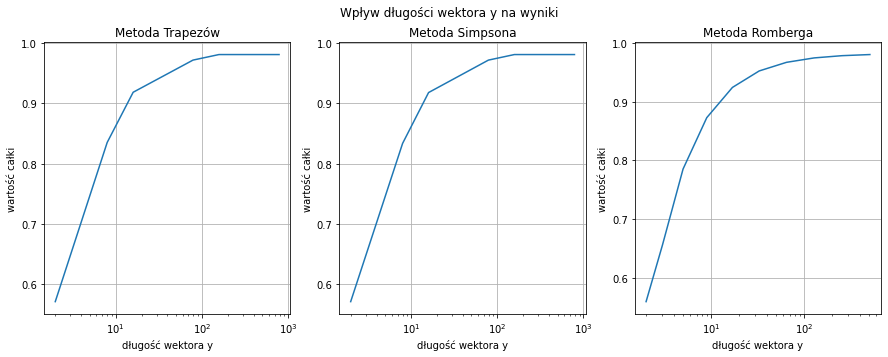

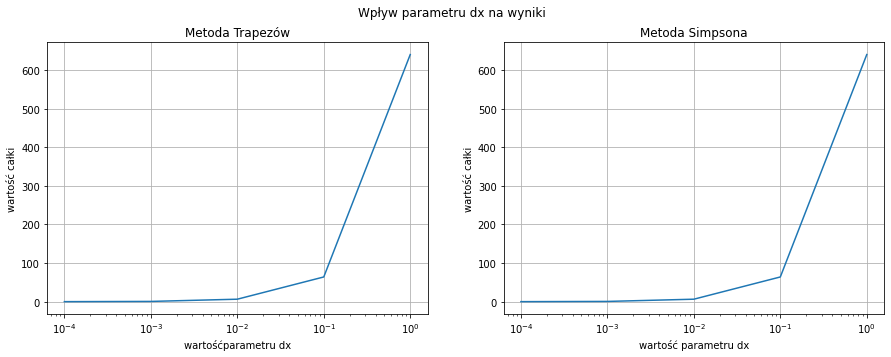

Wynik funkcji quad:  0.9817476552132313

Wynik funkcji romberg:  0.9817476552132957

Wynik funkcji quadrature:  0.9817476551901329


In [55]:
trapz = []
trapz2 = []
simps = []
simps2 = []
romb = []
len_x = []
len2_x = []

a = 0
b = np.pi / 4
fx = lambda x: np.exp(x**2)

for it in [0.5, 0.1, 0.05, 0.01, 0.005, 0.001]:
    x = np.arange(a, b, it)
    trapz.append(scipy.integrate.trapz(fx(x), x))
    simps.append(scipy.integrate.simps(fx(x), x))
    len_x.append(len(x))

for it in range(0, 10):
    x = np.linspace(a, b, 2 ** it + 1)
    romb.append(scipy.integrate.romb(fx(x), dx=np.pi/4/(2**it+1)))
    len2_x.append(len(x))

for dx in [1, 0.1, 0.01, 0.001, 0.0001]:
    trapz2.append(scipy.integrate.trapz(fx(x), dx=dx))
    simps2.append(scipy.integrate.simps(fx(x), dx=dx))

quad = scipy.integrate.quad(fx, a, b)
romberg = scipy.integrate.romberg(fx, a, b)
quadrature = scipy.integrate.quadrature(fx, a, b)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle('Wpływ długości wektora y na wyniki')
ax1.grid()
ax1.semilogx(len_x, trapz)
ax1.set_title('Metoda Trapezów')
ax1.set_ylabel('wartość całki')
ax1.set_xlabel('długość wektora y')
ax2.grid()
ax2.semilogx(len_x, simps)
ax2.set_title('Metoda Simpsona')
ax2.set_ylabel('wartość całki')
ax2.set_xlabel('długość wektora y')
ax3.grid()
ax3.semilogx(len2_x, romb)
ax3.set_title('Metoda Romberga')
ax3.set_ylabel('wartość całki')
ax3.set_xlabel('długość wektora y')
plt.show()

dx = [1, 0.1, 0.01, 0.001, 0.0001]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Wpływ parametru dx na wyniki')
ax1.grid()
ax1.semilogx(dx, trapz2)
ax1.set_title('Metoda Trapezów')
ax1.set_ylabel('wartość całki')
ax1.set_xlabel('wartośćparametru dx')
ax2.grid()
ax2.semilogx(dx, simps2)
ax2.set_title('Metoda Simpsona')
ax2.set_ylabel('wartość całki')
ax2.set_xlabel('wartość parametru dx')
plt.show()

print('Wynik funkcji quad: ', quad[0])
print('\nWynik funkcji romberg: ',romberg)
print('\nWynik funkcji quadrature: ', quadrature[0])

In [69]:
print('Metoda Trapezów:')
%timeit -r 100 -n 100 -o scipy.integrate.trapz(fx(x), x)

print('\nMetoda Simpsona:')
%timeit -r 100 -n 100 -o scipy.integrate.simps(fx(x), x)

print('\nMetoda Romberga:')
%timeit -r 100 -n 100 -o scipy.integrate.romb(fx(x), dx=np.pi/4/(2**10+1))

print('\nFukcja quad:')
%timeit -r 100 -n 100 -o scipy.integrate.quad(fx, a, b)

print('\nFunkcja romberg:')
%timeit -r 100 -n 100 -o scipy.integrate.romberg(fx, a, b)

print('\nFunkcja quadrature:')
%timeit -r 100 -n 100 -o scipy.integrate.quadrature(fx, a, b)

Metoda Trapezów:
47.1 µs ± 13.2 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)

Metoda Simpsona:
80.1 µs ± 20.1 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)

Metoda Romberga:
173 µs ± 27.7 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)

Fukcja quad:
80.8 µs ± 16.7 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)

Funkcja romberg:
53.3 µs ± 12.5 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)

Funkcja quadrature:
56.5 µs ± 11 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)


<TimeitResult : 56.5 µs ± 11 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)>

Wnioski: Zapoznałem się z metodami całkowania numerycznego funkcji. Poznałem trzy z takich metod, zbadałem wpływ wektora y oraz parametru dx przekazywanego w funkcji, na uzyskane wyniki. Porównałem uzyskane wyniki oraz czas obliczeń z trzema innymi funkcjami.